['0', '6', '1', '2', '3', '4', '5', '7', '8', '9', '10', '11', '12', '13', '14']
[('0', '6'), ('6', '1'), ('6', '2'), ('6', '3'), ('6', '4'), ('6', '5'), ('4', '7'), ('7', '8'), ('7', '10'), ('8', '9'), ('10', '11'), ('10', '12'), ('10', '13'), ('10', '14')]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


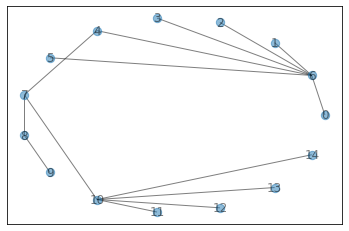

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
#import numpy as np

#1. We read the data
fh=open("./Resources/small_network.txt", 'rb')
G=nx.read_edgelist(fh)
fh.close()

#2. We print the nodes, the edges and the adjacency matrix
print(G.nodes)
print(G.edges)

M = nx.adjacency_matrix(G, nodelist=None)
print(M.todense())

#3. Finally, we plot the netwok

pos = nx.circular_layout(G)
nx.draw_networkx(G,pos,node_size=70,alpha=0.5,with_labels=True)

plt.show()

In [ ]:
# Calculate centralities
def centrality(G):
    return nx.betweenness_centrality(G)

## Community

Number of edge: 2519
Modularity:  0.46363028045212873


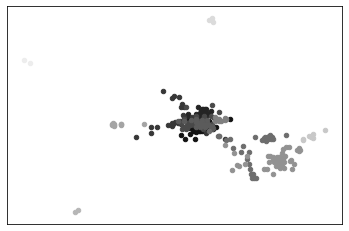

In [30]:
# pip install python-louvain

import community
import matplotlib.pyplot as plt
import networkx as nx

fh=open("0.edges", 'rb')
G=nx.read_edgelist(fh)
fh.close()

print("Number of edge: " + repr(G.number_of_edges()))
pos = nx.spring_layout(G)

partition = community.best_partition(G) #  The partition of the graph nodes which maximises the modularity
r=community.modularity(partition,G)

print('Modularity: ', r)

#drawing
size = float(len(set(partition.values())))

count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

#nx.draw_networkx_edges(G,pos, node_size=20)
plt.show()

